In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from scipy import special

In [9]:
currant=0.5
Lambda_0 = 0.5
Sigma=0.5


Length=20
Duration=30
T_0=1
Theta=0.5

x_number=100
t_number=int((Duration*(T_0**Sigma))*(Lambda_0*Duration*x_number**2)/(Length**2*currant))
print(t_number)

c=np.sqrt(T_0**Sigma*Lambda_0/Sigma)

22500


In [10]:
x_grad=np.linspace(0,Length,x_number)
t_grad=np.linspace(0,Duration,t_number)
x_step=x_grad[1]-x_grad[0]
t_step=t_grad[1]-t_grad[0]

Explicit=Implicit=Model=np.zeros((x_number,t_number))

Explicit[:,0]=Model[:,0]=Implicit[:,0]=0
Explicit[0,:]=Model[0,:]=Implicit[0,:]=T_0*(t_grad[:]**(1/Sigma))
Explicit[-1,:]=Model[-1,:]=Implicit[-1,:]=0

In [52]:
#derivatives
def Lambda(T):
    return Lambda_0*T**Sigma
def Lambda_Plus(Lambda):
    if(Lambda+np.roll(Lambda,-1)<0.1):
        return (Lambda+np.roll(Lambda,-1))/2
    else:
        return 2*(Lambda*np.roll(Lambda,-1))/(Lambda+np.roll(Lambda,-1))
def Lambda_Minus(Lambda):
    if(Lambda+np.roll(Lambda,+1)<0.1):
        return (Lambda+np.roll(Lambda,+1))/2
    else:
        return 2*(Lambda*np.roll(Lambda,-1))/(Lambda+np.roll(Lambda,-1))

    
def Lambda_Plus_i(Lambda,Lambda_next):
    if(Lambda+Lambda_next<0.1):
        return (Lambda+Lambda_next)/2
    else:
        return 2*(Lambda*Lambda_next)/(Lambda+Lambda_next)
def Lambda_Minus_i(Lambda,Lambda_pr):
    if(Lambda+Lambda_pr<0.1):
        return (Lambda+Lambda_pr)/2
    else:
        return 2*(Lambda*Lambda_pr)/(Lambda+Lambda_pr)

    
    
def SecondDer(L_p,L_m,T):
    return (L_p*(np.roll(T,-1)-T)-L_m*(T-np.roll(T,+1)))/x_step**2

In [53]:
#Explicit
for t in range(0,t_number-1):
    layer_cur=Explicit[:,t]
    L=Lambda(layer_cur)
    for i in range(0,x_number-1):
        L_p[i]=Lambda_Plus_i(L[i],L[i+1])
        L_m[i]=Lambda_Minus_i(L[i],L[i-1])
    #L_p=Lambda_Plus(L)
    #L_m=Lambda_Minus(L)
    Explicit[:,t+1]=Explicit[:,t]+t_step*SecondDer(L_p[:],L_m[:],Explicit[:,t])

In [59]:
#Implicit coefficietns
def calculate(layer,L,t):
    alpha=np.linspace(0,Length,x_number)
    beta=np.linspace(0,Length,x_number)
    beta[1]=T_0*(t**(1/Sigma))
    
    for i in range(0,x_number-1):
        L_p[i]=Lambda_Plus_i(L[i],L[i+1])
        L_m[i]=Lambda_Minus_i(L[i],L[i-1])
    
    a=Theta*t_step*L_m/(x_step**2)
    b=Theta*t_step*L_p/(x_step**2)
    c=a+b+1
    d=layer+(1-Theta)*t_step*SecondDer(L_p,L_m,layer)

    for i in range(1,len(layer)-1):
        alpha[i+1]=b[i]/(c[i]-a[i]*alpha[i])
        beta[i+1]=(a[i]*beta[i]+d[i])/(c[i]-a[i]*alpha[i])
    return alpha,beta

In [60]:
#Implicit scheme
for t in range(0,t_number-1):
    layer=Implicit[:,t]
    L=Lambda(layer)
    alpha,beta=calculate(layer,L,t)
    
    for i in reversed(range(0,x_number-1)):
            Implicit[x][t+1]=alpha[x+1]*Implicit[x+1][t+1]+beta[x+1]

In [61]:
#Model
for t in range(0,t_number-1):
    for x in range(0,x_number-1):
        if(x*x_step<=c*t*t_step):
            Model[x][t]=(Sigma*c*(c*t*t_step-x*x_step)/Lambda_0)**(1/Sigma)
        else:
            Model[x][t]=0

In [62]:
def perestroyka(q,i):
    a=[]
    for f in q.tolist():
        a.append(f[i])
    a=np.array(a)
    return a

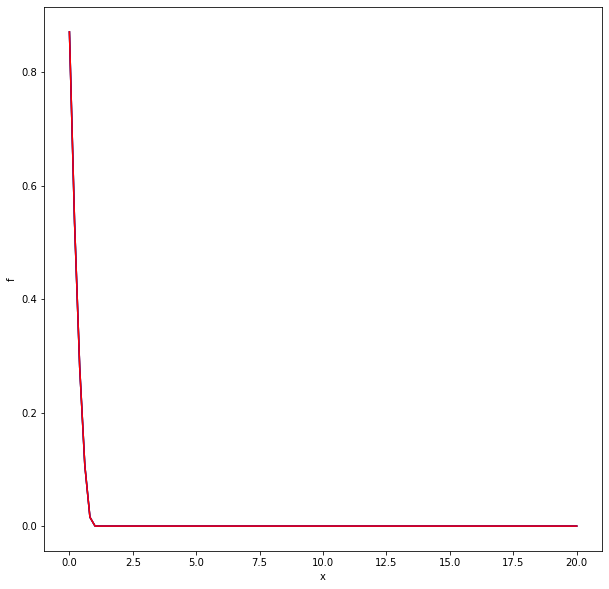

In [66]:
#chart
time=700

plt.figure(figsize=(10,10)) 
plt.ylabel('f') 
plt.xlabel('x') 
plt.plot(x_grad,perestroyka(Explicit,time),c='black') 
plt.plot(x_grad,perestroyka(Model,time),c='blue')
plt.plot(x_grad,perestroyka(Implicit,time),c='red')

plt.show()